# Unit Testing
Unit Testing is where each unit of the system is tested individually. The purpose is to isolate each part of the system to verify that they are working as specified. The use of this type of test throughout the implementation is possible to reduce the amount of bugs in the application. It works by comparing the output of a function to be tested with expected values.

Watch the following 2-min video for a more clear understanding about Unit Testing.

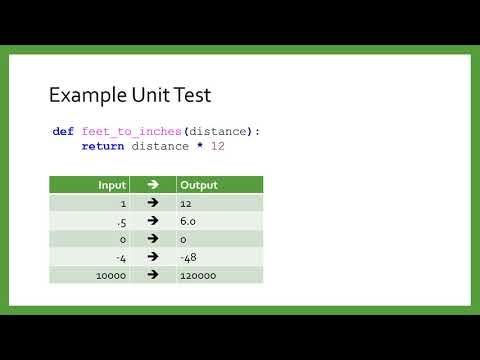

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('upzTwaVNZzs')

## Basic example

Following we have a method called ```add``` that computes the sum of two variables:

In [ ]:
def add(a, b):
    return a + b

The objective is to ensure `add` is working properly and giving the right output when receiving any two variables. To keep this tutorial as practical as possible we will be using Google Colab as a default code environment to give you a more comfort way when dealing with coding, as you'll be able to run it and edit it based on your needs.

### **Hands-On**

Get into a full-coded Basic Calculator Test Case with much more details on how to use Unit Testing.

<a 
href="https://colab.research.google.com/github/damorimRG/practical_testing_book/blob/master/testgranularity/calculator_example.ipynb" target="_blank"> 
<img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"></a>

## Assertions

Unittest has several functions, known as `Assertions`, useful for the development of unit tests. Below are some of these functions and a brief explanation:

|Method|Checks that|
|------|------|
|assertEqual(a, b)|a == b|
|assertNotEqual(a, b)|a != b|
|assertTrue(x)|bool(x) is True|
|assertFalse(x)|bool(x) is False|
|assertIs(a, b)|a is b|

You can find the full table [here](https://docs.python.org/3/library/unittest.html#assert-methods).

### **Hands-On**

For a better understanding on how those functions work you can test them on Google Colab. There are plenty of comments and a very good explanation in it. Go ahead and test it!

<a 
href="https://colab.research.google.com/github/damorimRG/practical_testing_book/blob/master/testgranularity/examples_asserts_functions.ipynb" target="_blank"> 
<img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"></a>

## Exception Testing

Likewise the `assert*` functions listed above there is also `assertRaises` function for testing an exception.

Use: `assertRaises(exception, callable, *args, **kwds)`

Where `exception` is the type of exception, `callable` is the method to be tested, and `args` are optional parameters passed to the `callable` method.

Follow the example below for a practical use of `assertRaises`.

### The circle example

The snippet below shows a simple example of Exception Handling.

We will be testing the circle's area given by **$\pi.r^2$**

In [ ]:
def circle_area(r):
    if type(r) not in [int, float]:
        raise TypeError("The radius must be a non-negative real number.")
    if r < 0:
        raise ValueError("The radius must not be negative.")
    return pi*(r**2)

So far you should be more confident on testing regular values but what about checking if a specific method raises the right exception on some input? That's what you will find out next.

### **Hands-On**

Check the full circle example in a more practical and intuitive way.

<a 
href="https://colab.research.google.com/github/damorimRG/practical_testing_book/blob/master/testgranularity/circle_example.ipynb" target="_blank"> 
<img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"></a>

---
💡 Check the [documentation](https://docs.python.org/3/library/unittest.html) for further information about **unittest**.